In [1]:
# !pip install catboost
# !pip install pycaret

In [2]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import datetime as dt
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
import catboost

import matplotlib.font_manager as fm
import matplotlib as mpl

warnings.filterwarnings(action='ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams["figure.figsize"] = (8,4)
mpl.rcParams['axes.grid'] = True 

In [4]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [5]:
train.shape, test.shape

((1205, 12), (50, 10))

In [6]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [7]:
train=train[train['일자']>='2020-03-22']
train2=train.set_index('일자')
train2=train.reset_index()
train2= train2.drop('index', axis=1)

train2.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2020-03-23,월,2950,109,178,687,285.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 감자국 꽈리고추...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시래기국 오리양념불고기*쌈무 (오리:국내산)...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 닭개장 (닭:국내산) 삼치튀김*데리야끼 한식...",1110.0,651.0
1,2020-03-24,화,2950,131,137,639,303.0,모닝롤/햄치즈샌드 우유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 쑥국 수제어묵볶...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 소고기미역국 (소고기:호주산) 해물누룽지탕 (...",오므라이스 (쌀:국내산) 가쯔오장국 돈육고구마강정 (돈육:국내산) 과일플레인샐러드...,1083.0,754.0
2,2020-03-25,수,2950,122,146,1,303.0,모닝롤/고구마파이 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 피홍합탕 감...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 유부주머니국 목살스테이크 (목살:국내산) 파...",찹쌀밥 장각닭죽 생야채*쌈짱 오렌지 하루야채주스 포기김치,1022.0,526.0
3,2020-03-26,목,2950,133,133,584,288.0,모닝롤/바나나샌드 우유/주스 계란후라이 새송이죽/쌀밥 (쌀:국내산) 버섯매운탕 (...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 배추된장국 제육볶음 (돈육:국내산) 계란찜 ...","멸치주먹밥 (쌀,현미흑미:국내산) 우동 해물까스*와사비소스 꽃맛살샐러드 무피클...",955.0,645.0
4,2020-03-27,금,2950,254,156,0,260.0,모닝롤/카스텔라 우유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 북어계란국 느타리...,"봄나물비빔밥 (쌀:국내산) 맑은국 치킨너겟 (닭:국내,수입산) 시저샐러드 마늘쫑...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시금치국 언양식불고기 (돈육:수입산) 꽁치감...",839.0,377.0


In [8]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [9]:
train[['현본사소속재택근무자수', '중식계', '석식계']] = train[['현본사소속재택근무자수', '중식계', '석식계']].astype('int')
test['현본사소속재택근무자수'] = test['현본사소속재택근무자수'].astype('int')
train['일자'].min(), train['일자'].max(), test['일자'].min(), test['일자'].max()

('2020-03-23', '2021-01-26', '2021-01-27', '2021-04-09')

####  df  = train, test 

In [10]:
df = train2.append(test)
df

df['일자'] = pd.to_datetime(df['일자'])
# df['년'] = df['일자'].dt.year
# df['월'] = df['일자'].dt.month
# df['일'] = df['일자'].dt.day
# df['주'] = df['일자'].dt.week
# df['요일'] = df['일자'].dt.weekday



df['출근'] = df['본사정원수']-(df['본사휴가자수']+df['본사출장자수']+df['현본사소속재택근무자수'])
df['출근비율'] = df['출근']/df['본사정원수']
df['휴가비율'] = df['본사휴가자수']/df['본사정원수']
df['출장비율'] = df['본사출장자수']/df['본사정원수']
df['야근비율'] = df['본사시간외근무명령서승인건수']/df['출근']
df['재택비율'] = df['현본사소속재택근무자수']/df['본사정원수']

df['중식특식여부'] =  np.where(df['중식메뉴'].str.contains('특식')==True, 1, 0) 
df['자기개발의날여부'] = np.where( (df['석식메뉴'].str.len()<=20) & (df['출근'] >0), 1, 0)

drop_cols = ['요일','출근','조식메뉴','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수']
df= df.drop(drop_cols, axis=1)

In [11]:
print(df.shape)
df.head()


(244, 12)


,일자,중식메뉴,석식메뉴,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부
0,2020-03-23,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시래기국 오리양념불고기*쌈무 (오리:국내산)...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 닭개장 (닭:국내산) 삼치튀김*데리야끼 한식...",1110.0,651.0,0.806102,0.036949,0.060339,0.288898,0.096610,0,0
1,2020-03-24,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 소고기미역국 (소고기:호주산) 해물누룽지탕 (...",오므라이스 (쌀:국내산) 가쯔오장국 돈육고구마강정 (돈육:국내산) 과일플레인샐러드...,1083.0,754.0,0.806441,0.044407,0.046441,0.268600,0.102712,0,0
2,2020-03-25,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 유부주머니국 목살스테이크 (목살:국내산) 파...",찹쌀밥 장각닭죽 생야채*쌈짱 오렌지 하루야채주스 포기김치,1022.0,526.0,0.806441,0.041356,0.049492,0.000420,0.102712,0,0
3,2020-03-26,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 배추된장국 제육볶음 (돈육:국내산) 계란찜 ...","멸치주먹밥 (쌀,현미흑미:국내산) 우동 해물까스*와사비소스 꽃맛살샐러드 무피클...",955.0,645.0,0.812203,0.045085,0.045085,0.243740,0.097627,0,0
4,2020-03-27,"봄나물비빔밥 (쌀:국내산) 맑은국 치킨너겟 (닭:국내,수입산) 시저샐러드 마늘쫑...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시금치국 언양식불고기 (돈육:수입산) 꽁치감...",839.0,377.0,0.772881,0.086102,0.052881,0.000000,0.088136,0,0


In [12]:
before_dataset = pd.to_datetime(df.loc[0,'일자']).min() - dt.timedelta(days=1)
after_dataset = pd.to_datetime(df.loc[0,'일자']).max() + dt.timedelta(days=1)
before_dataset = before_dataset.strftime("%Y-%m-%d")
after_dataset = after_dataset.strftime("%Y-%m-%d")
before_dataset, after_dataset

('2020-03-22', '2021-01-28')

## 공휴일 공통함수
<pre>
서비스 URL: http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/{서비스오퍼레이션}

서비스	종류		오퍼레이션명
-----	------	--------------
국경일 정보조회	getHoliDeInfo	01: 국경일 (ex: 어린이날, 광복절, 개천절)
공휴일 정보조회	getRestDeInfo
기념일 정보조회	getAnniversaryInfo	02: 기념일 (ex: 의병의 날, 정보보호의 날, 4/19 혁명 기념일)
24절기 정보조회	get24DivisionsInfo	03: 24절기 (ex: 청명, 경칩, 하지)
잡절   정보조회	getSundryDayInfo	04: 잡절 (ex: 단오, 한식)
</pre>

In [13]:
## 공휴일

import requests
from urllib import parse
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

def get_holiday(syear=2020, eyear=2021 ) :
    api_key_utf8 = "pLlZwGigTf4euiGFUdQ7ktJfpWwXA5CiHJPPtfQgwx45SHhTgIiEjF4k72HaTqHiet8qB%2F0JYw1XYOUH%2FKlRSw%3D%3D"
    api_key_decode = parse.unquote(api_key_utf8)
    operation_name_list =['getHoliDeInfo'] #,'getAnniversaryInfo','get24DivisionsInfo','getSundryDayInfo']
    
    item_list = []
    for holiday_type in operation_name_list:
        url = "http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/" + holiday_type
        for year in np.arange(syear, eyear+1) : 
            params = {
                "ServiceKey": api_key_decode,
                "solYear": year,
                "numOfRows": 100
            }

            response = requests.get(url, params=params)
            xml = BeautifulSoup(response.text, "lxml")
            items = xml.find('items')
            item_dict = {}
            for item in items:
                item_dict = {
                    "날짜": datetime.strptime(item.find("locdate").text.strip(), '%Y%m%d'),
                    "휴일여부": item.find("isholiday").text.strip(),
                    "종류" : item.find("datekind").text.strip(),
                    "이름":  item.find("datename").text.strip()
                }
                item_list.append(item_dict)
            res_df = pd.DataFrame(item_list)
            res_df = res_df.fillna('')
            res_df['휴일여부'].replace('Y', 1, inplace=True)
            res_df['휴일여부'].replace('N', 0, inplace=True)
            res_df['휴일여부'].fillna(0)
            res_df['휴일여부'] = res_df['휴일여부'].astype('int')
            # res_df['휴일여부'] = res_df['일자'].apply(lambda x:  1 if x in list else 0)
    return res_df


#### min date ~ max date 날짜 전체 

In [14]:
start_date = pd.to_datetime(df['일자'].min())  #.year
end_date = pd.to_datetime(df['일자'].max())   #.year
dates = pd.date_range(start_date,end_date,freq='D') 
date_df = pd.DataFrame({'날짜':dates})
date_df.head()

,날짜
0,2020-03-23
1,2020-03-24
2,2020-03-25
3,2020-03-26
4,2020-03-27


#### min date ~ max date 날짜 사이의 공휴일

In [15]:
#외부데이터 적용

start_year = pd.to_datetime(before_dataset).year  #df['일자'].min()).year
end_year = pd.to_datetime(after_dataset).year   #df['일자'].max()).year
holiday_df = get_holiday(start_year,end_year)
holiday_df.head()

,날짜,휴일여부,종류,이름
0,2020-01-01,1,01,1월1일
1,2020-01-24,1,01,설날
2,2020-01-25,1,01,설날
3,2020-01-26,1,01,설날
4,2020-01-27,1,01,설날


#### 달력만들기 : 날짜 전체 , 공휴일 merge, 년, 월, 일, 주, 요일 피쳐 추가

In [16]:
cal_df = pd.merge(date_df, holiday_df[holiday_df['종류']=='01'] , on='날짜', how='left')
cal_df = cal_df[['날짜','휴일여부']]  
cal_df.fillna(0, inplace=True)
cal_df['휴일여부'] = cal_df['휴일여부'].astype('int')
cal_df.head()

,날짜,휴일여부
0,2020-03-23,0
1,2020-03-24,0
2,2020-03-25,0
3,2020-03-26,0
4,2020-03-27,0


In [17]:
# cal_df['휴일여부'].fillna(0, inplace=True)
# cal_df['휴일여부'] = cal_df['휴일여부'].astype('int')
# cal_df = cal_df.fillna('')
# cal_df['년'] = cal_df['날짜'].dt.year
# cal_df['월'] = cal_df['날짜'].dt.month
# cal_df['일'] = cal_df['날짜'].dt.day
# cal_df['주'] = cal_df['날짜'].dt.week
# cal_df['요일'] = cal_df['날짜'].dt.weekday
# cal_df.loc[(cal_df['요일']==5) | (cal_df['요일']==6), '휴일여부'] = 1
# cal_df['코로나발생'] = cal_df['년'].apply(lambda x:  1 if x>=2020 else 0)
# cal_df.head()

cal_df['휴일여부'].fillna(0, inplace=True)
cal_df['휴일여부'] = cal_df['휴일여부'].astype('int')
cal_df = cal_df.fillna('')
cal_df['년'] = cal_df['날짜'].dt.year
cal_df['월'] = cal_df['날짜'].dt.month
cal_df['일'] = cal_df['날짜'].dt.day
cal_df['주'] = cal_df['날짜'].dt.week
cal_df['요일'] = cal_df['날짜'].dt.weekday
cal_df.loc[(cal_df['요일']==5) | (cal_df['요일']==6), '휴일여부'] = 1
cal_df.head()

#날짜를 각각의 연월일주요일로 파생변수처리

,날짜,휴일여부,년,월,일,주,요일
0,2020-03-23,0,2020,3,23,13,0
1,2020-03-24,0,2020,3,24,13,1
2,2020-03-25,0,2020,3,25,13,2
3,2020-03-26,0,2020,3,26,13,3
4,2020-03-27,0,2020,3,27,13,4


In [18]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 382
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      383 non-null    datetime64[ns]
 1   휴일여부    383 non-null    int32         
 2   년       383 non-null    int64         
 3   월       383 non-null    int64         
 4   일       383 non-null    int64         
 5   주       383 non-null    int64         
 6   요일      383 non-null    int64         
dtypes: datetime64[ns](1), int32(1), int64(5)
memory usage: 22.4 KB


In [19]:
cal_df.isna().sum()

날짜      0
휴일여부    0
년       0
월       0
일       0
주       0
요일      0
dtype: int64

In [20]:
#12열 관련 

before_dataset_holiday = 0
if before_dataset in cal_df['날짜']:
    before_dataset_holiday = 1

after_dataset_holiday = 0
if after_dataset in cal_df['날짜']:
    after_dataset_holiday = 1
before_dataset_holiday, after_dataset_holiday

(0, 0)

In [21]:
# g = 휴일.groupby('날짜')  #  GROUP BY A
# ss = g.filter(lambda x: len(x) > 1)  #  HAVING COUNT(*) > 1
# ss.head()

# cal_df['공휴일'] = cal_df['일자'].apply(lambda x:  1 if x in list else 0)

#### 달력(기준) , 식수정보 merge

In [22]:
cdf = pd.merge(cal_df, df,
             how='left', # left, right, inner (default), outer
             left_on='날짜', right_on='일자')


In [23]:
menu_df = cdf[['중식메뉴','석식메뉴']].copy()
drop_cols = ['일자','중식메뉴','석식메뉴']
cdf= cdf.drop(drop_cols, axis=1)
cdf.head()

,날짜,휴일여부,년,월,일,주,요일,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부
0,2020-03-23,0,2020,3,23,13,0,1110.0,651.0,0.806102,0.036949,0.060339,0.288898,0.096610,0.0,0.0
1,2020-03-24,0,2020,3,24,13,1,1083.0,754.0,0.806441,0.044407,0.046441,0.268600,0.102712,0.0,0.0
2,2020-03-25,0,2020,3,25,13,2,1022.0,526.0,0.806441,0.041356,0.049492,0.000420,0.102712,0.0,0.0
3,2020-03-26,0,2020,3,26,13,3,955.0,645.0,0.812203,0.045085,0.045085,0.243740,0.097627,0.0,0.0
4,2020-03-27,0,2020,3,27,13,4,839.0,377.0,0.772881,0.086102,0.052881,0.000000,0.088136,0.0,0.0


In [24]:
cdf['전일휴일'] = cdf['휴일여부'].shift(1)
cdf['다음날휴일'] = cdf['휴일여부'].shift(-1)

In [25]:
cdf.head()

,날짜,휴일여부,년,월,일,주,요일,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,전일휴일,다음날휴일
0,2020-03-23,0,2020,3,23,13,0,1110.0,651.0,0.806102,0.036949,0.060339,0.288898,0.096610,0.0,0.0,NaN,0.0
1,2020-03-24,0,2020,3,24,13,1,1083.0,754.0,0.806441,0.044407,0.046441,0.268600,0.102712,0.0,0.0,0.0,0.0
2,2020-03-25,0,2020,3,25,13,2,1022.0,526.0,0.806441,0.041356,0.049492,0.000420,0.102712,0.0,0.0,0.0,0.0
3,2020-03-26,0,2020,3,26,13,3,955.0,645.0,0.812203,0.045085,0.045085,0.243740,0.097627,0.0,0.0,0.0,0.0
4,2020-03-27,0,2020,3,27,13,4,839.0,377.0,0.772881,0.086102,0.052881,0.000000,0.088136,0.0,0.0,0.0,1.0


In [26]:
cdf.shape

(383, 18)

In [27]:
#전일, 다음날 휴일 여부 결측처리
cdf.at[0,'전일휴일'] = before_dataset_holiday #20열
cdf.at[cdf.shape[0]-1,'다음날휴일'] =  after_dataset_holiday

In [28]:
#cdf 결측확인
cdf.isna().sum()

날짜            0
휴일여부          0
년             0
월             0
일             0
주             0
요일            0
중식계         189
석식계         189
출근비율        139
휴가비율        139
출장비율        139
야근비율        139
재택비율        139
중식특식여부      139
자기개발의날여부    139
전일휴일          0
다음날휴일         0
dtype: int64

In [29]:
# cdf 결측처리

cdf.fillna(0, inplace=True)
cdf[['중식특식여부','자기개발의날여부','전일휴일','다음날휴일']] = cdf[['중식특식여부','자기개발의날여부','전일휴일','다음날휴일']].astype('int')

In [30]:
cdf.isna().sum()

날짜          0
휴일여부        0
년           0
월           0
일           0
주           0
요일          0
중식계         0
석식계         0
출근비율        0
휴가비율        0
출장비율        0
야근비율        0
재택비율        0
중식특식여부      0
자기개발의날여부    0
전일휴일        0
다음날휴일       0
dtype: int64

In [31]:
# cdf = cdf.set_index('날짜')
cdf.head()

,날짜,휴일여부,년,월,일,주,요일,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,전일휴일,다음날휴일
0,2020-03-23,0,2020,3,23,13,0,1110.0,651.0,0.806102,0.036949,0.060339,0.288898,0.096610,0,0,0,0
1,2020-03-24,0,2020,3,24,13,1,1083.0,754.0,0.806441,0.044407,0.046441,0.268600,0.102712,0,0,0,0
2,2020-03-25,0,2020,3,25,13,2,1022.0,526.0,0.806441,0.041356,0.049492,0.000420,0.102712,0,0,0,0
3,2020-03-26,0,2020,3,26,13,3,955.0,645.0,0.812203,0.045085,0.045085,0.243740,0.097627,0,0,0,0
4,2020-03-27,0,2020,3,27,13,4,839.0,377.0,0.772881,0.086102,0.052881,0.000000,0.088136,0,0,0,1


Index(['중식계', '석식계', '출근비율', '재택비율', '출장비율', '야근비율', '휴가비율', '월', '주',
       '자기개발의날여부', '일', '전일휴일', '다음날휴일', '년', '요일', '휴일여부'],
      dtype='object')


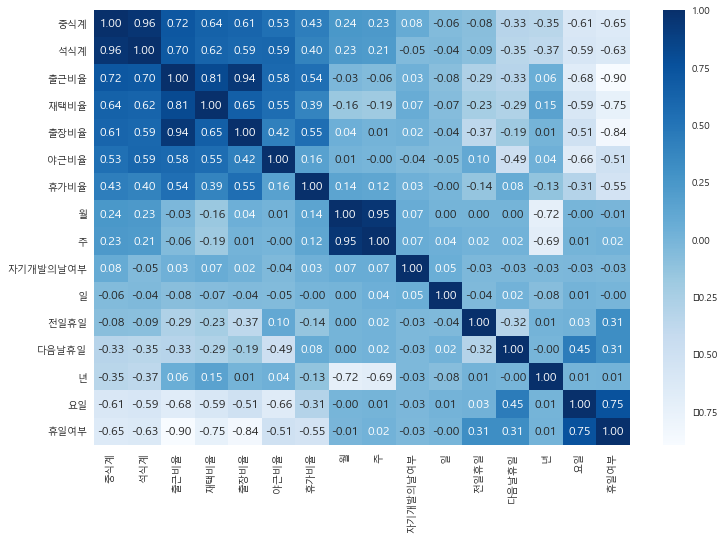

In [32]:
# 타겟에 영향미치는 피쳐 상관도 

중식계_corr_feature  = cdf.corr().nlargest(20, '중식계').index
print(중식계_corr_feature)
plt.figure(figsize=(12,8))
sns.heatmap(cdf[중식계_corr_feature].corr(), annot=True, cmap='Blues', fmt='0.2f')
plt.show()

In [33]:
# 중식계에 정비례/반비례하게 영향미치는 피쳐5개

print(cdf.corrwith(cdf["중식계"]).sort_values(ascending=False)[:5])
print(cdf.corrwith(cdf["중식계"]).sort_values(ascending=False)[-5:])

중식계     1.000000
석식계     0.959530
출근비율    0.718418
재택비율    0.635973
출장비율    0.612051
dtype: float64
다음날휴일    -0.326256
년        -0.346320
요일       -0.605600
휴일여부     -0.649044
중식특식여부         NaN
dtype: float64


In [34]:
# 석식계에 정비례/반비례하게 영향미치는 피쳐5개

print(cdf.corrwith(cdf["석식계"]).sort_values(ascending=False)[:5])
print(cdf.corrwith(cdf["석식계"]).sort_values(ascending=False)[-5:])

석식계     1.000000
중식계     0.959530
출근비율    0.699365
재택비율    0.617894
야근비율    0.593167
dtype: float64
다음날휴일    -0.345798
년        -0.371587
요일       -0.590453
휴일여부     -0.629013
중식특식여부         NaN
dtype: float64


In [35]:
cdf.head(20)

,날짜,휴일여부,년,월,일,주,요일,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,전일휴일,다음날휴일
0,2020-03-23,0,2020,3,23,13,0,1110.0,651.0,0.806102,0.036949,0.060339,0.288898,0.096610,0,0,0,0
1,2020-03-24,0,2020,3,24,13,1,1083.0,754.0,0.806441,0.044407,0.046441,0.268600,0.102712,0,0,0,0
2,2020-03-25,0,2020,3,25,13,2,1022.0,526.0,0.806441,0.041356,0.049492,0.000420,0.102712,0,0,0,0
3,2020-03-26,0,2020,3,26,13,3,955.0,645.0,0.812203,0.045085,0.045085,0.243740,0.097627,0,0,0,0
4,2020-03-27,0,2020,3,27,13,4,839.0,377.0,0.772881,0.086102,0.052881,0.000000,0.088136,0,0,0,1
5,2020-03-28,1,2020,3,28,13,5,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,1
6,2020-03-29,1,2020,3,29,13,6,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0
7,2020-03-30,0,2020,3,30,14,0,1000.0,625.0,0.738644,0.077966,0.017966,0.287747,0.165424,0,0,1,0
8,2020-03-31,0,2020,3,31,14,1,859.0,601.0,0.739322,0.065424,0.014576,0.242091,0.180678,0,0,0,0
9,2020-04-01,0,2020,4,1,14,2,939.0,561.0,0.762323,0.076975,0.018906,0.000000,0.141796,0,0,0,0


In [36]:
cdf.shape

(383, 18)

### 카레고리화

In [37]:
# cdf.loc[:, ['월', '일', '주', '요일']] = cdf.loc[:, ['월', '일', '주', '요일']].astype('str')
# cdf.info()


In [38]:
# cdf = pd.get_dummies(cdf)
# cdf.shape

## 1. 달력형 train 원본 test

In [39]:
# ((1205, 12), (50, 10))
train['일자'].min(), train['일자'].max(), test['일자'].min(), test['일자'].max()

('2020-03-23', '2021-01-26', '2021-01-27', '2021-04-09')

In [40]:
#확인용
print(cdf['날짜'][:5])
print(cdf['날짜'][-5:])
print(train['일자'][:5])
print(train['일자'][-5:])
print(cdf.shape, train.shape, test.shape)

0   2020-03-23
1   2020-03-24
2   2020-03-25
3   2020-03-26
4   2020-03-27
Name: 날짜, dtype: datetime64[ns]
378   2021-04-05
379   2021-04-06
380   2021-04-07
381   2021-04-08
382   2021-04-09
Name: 날짜, dtype: datetime64[ns]
1011    2020-03-23
1012    2020-03-24
1013    2020-03-25
1014    2020-03-26
1015    2020-03-27
Name: 일자, dtype: object
1200    2021-01-20
1201    2021-01-21
1202    2021-01-22
1203    2021-01-25
1204    2021-01-26
Name: 일자, dtype: object
(383, 18) (194, 12) (50, 10)


In [41]:
cdf_train = cdf[cdf['날짜'] <= train['일자'].max()]#train, test 나누기
cdf_test = cdf[cdf['날짜'] > train['일자'].max()]
cdf_test  = cdf_test[cdf_test['날짜'].isin(test['일자'].values)]
# cdf_test = cdf_test.drop(['중식계','석식계'], axis=1)
print(cdf_train.shape, cdf_test.shape)
# print(cdf_train['날짜'].min(), cdf_train['날짜'].max(), cdf_test['날짜'].min(), cdf_test['날짜'].max())

(310, 18) (50, 18)


In [42]:
#확인용
print(cdf_train.head(1))
print("==="*30)
print(cdf_test.head(1))

          날짜  휴일여부     년  월   일   주  요일     중식계    석식계      출근비율      휴가비율  \
0 2020-03-23     0  2020  3  23  13   0  1110.0  651.0  0.806102  0.036949   

       출장비율      야근비율     재택비율  중식특식여부  자기개발의날여부  전일휴일  다음날휴일  
0  0.060339  0.288898  0.09661       0         0     0      0  
            날짜  휴일여부     년  월   일  주  요일  중식계  석식계      출근비율      휴가비율  \
310 2021-01-27     0  2021  1  27  4   2  0.0  0.0  0.789474  0.029501   

         출장비율      야근비율      재택비율  중식특식여부  자기개발의날여부  전일휴일  다음날휴일  
310  0.061012  0.002123  0.120013       0         0     0      0  


In [43]:
cdf_train = cdf_train.drop('날짜', axis=1) #연월일 만들었으니까 제거
cdf_test = cdf_test.drop('날짜', axis=1)

In [44]:
cdf_train.shape,cdf_test.shape #컬럼수 맞췄는지 확인

((310, 17), (50, 17))

In [45]:
cdf_test.head() #컬럼 확인

,휴일여부,년,월,일,주,요일,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,전일휴일,다음날휴일
310,0,2021,1,27,4,2,0.0,0.0,0.789474,0.029501,0.061012,0.002123,0.120013,0,0,0,0
311,0,2021,1,28,4,3,0.0,0.0,0.777405,0.034864,0.071069,0.176369,0.116661,0,0,0,0
312,0,2021,1,29,4,4,0.0,0.0,0.727456,0.090513,0.083473,0.000000,0.098558,0,0,0,1
315,0,2021,2,1,5,0,0.0,0.0,0.800274,0.036936,0.052668,0.229915,0.110123,0,0,1,0
316,0,2021,2,2,5,1,0.0,0.0,0.807798,0.021204,0.063611,0.192633,0.107387,0,0,0,0


# 예측 모델

In [47]:
submission_esb = pd.read_csv('./sample_submission.csv') #제출 파일 미리 불러오기
print(submission_esb.shape, cdf_test.shape)
submission_esb.head()

(50, 3) (50, 17)


,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


### pycaret
* ref : https://pycaret.readthedocs.io/en/latest/api/classification.html

### 중식계 예측

In [48]:
reg = setup(data=cdf_train,
            target='중식계',
            numeric_imputation = 'mean',
            normalize = True,
            data_split_shuffle= False,
            silent= True,
           normalize_method='robust',  #minmax IQR기준으로 스케일링
           fold_strategy = "kfold", # kfold, skfold, timeseries 등
            fold=20
           )

,Description,Value
0,session_id,548
1,Target,중식계
2,Original Data,"(310, 17)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(216, 29)"


In [49]:
best_5_l = compare_models(sort='MAE', n_select=5)
#45.1504(rf) # fold10 :44.1489 (catboost) / fold20:	43.7880(rf) # timeseries: Regressor	48.7279(gbr) /fold20:44.9478(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,40.8809,3934.2516,58.6448,0.9227,0.9078,nan,0.0315
rf,Random Forest Regressor,43.5679,4964.4121,64.4783,0.9613,0.0839,nan,0.0885
catboost,CatBoost Regressor,44.3644,4554.1193,62.6645,0.9151,1.0377,nan,0.7225
gbr,Gradient Boosting Regressor,44.7681,4846.6523,64.5488,0.9179,0.4226,nan,0.0335
et,Extra Trees Regressor,46.5615,6267.8188,71.9871,0.9428,0.0916,nan,0.0880
ada,AdaBoost Regressor,47.5096,5653.0101,70.4896,0.9597,0.0914,nan,0.0455
xgboost,Extreme Gradient Boosting,49.7212,6184.7394,73.8627,0.9085,0.1138,nan,0.2090
knn,K Neighbors Regressor,55.9488,8080.3751,82.2663,0.9360,0.1089,nan,0.0060
huber,Huber Regressor,56.6059,6496.0030,74.4214,0.9030,1.8301,nan,0.0175
lasso,Lasso Regression,58.3385,6471.5411,77.3365,0.9030,1.8368,nan,0.0050


In [50]:
# 앙상블 모델
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE') #47.4682 #fold 10 :47.8797 /fold20:	46.9146	  #timeseries 51.8096/fold20:48.1131
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, cdf_test)
# submission_esb

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,47.5434,4299.4040,65.5698,0.9799,0.8232,0.0821
1,64.4888,8552.5675,92.4801,0.9527,0.5905,0.1371
2,48.1113,6584.7320,81.1464,0.9667,0.9100,0.1076
3,41.4779,3935.2129,62.7313,0.9783,0.5660,0.0708
4,33.6499,3456.3589,58.7908,0.9831,0.8468,0.0791
Mean,47.0543,5365.6551,72.1437,0.9721,0.7473,0.0953
SD,10.1597,1922.0316,12.6864,0.0112,0.1411,0.0242


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,80.7839,16664.7277,129.0919,0.9319,0.4104,0.1276


In [51]:
pred_esb_l

,휴일여부,년,월,일,주,요일,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,전일휴일,다음날휴일,Label
310,0,2021,1,27,4,2,0.0,0.0,0.789474,0.029501,0.061012,0.002123,0.120013,0,0,0,0,923.573983
311,0,2021,1,28,4,3,0.0,0.0,0.777405,0.034864,0.071069,0.176369,0.116661,0,0,0,0,853.696894
312,0,2021,1,29,4,4,0.0,0.0,0.727456,0.090513,0.083473,0.000000,0.098558,0,0,0,1,569.062825
315,0,2021,2,1,5,0,0.0,0.0,0.800274,0.036936,0.052668,0.229915,0.110123,0,0,1,0,1054.533159
316,0,2021,2,2,5,1,0.0,0.0,0.807798,0.021204,0.063611,0.192633,0.107387,0,0,0,0,916.343217
317,0,2021,2,3,5,2,0.0,0.0,0.813953,0.020178,0.068057,0.002101,0.097811,0,0,0,0,883.556199
318,0,2021,2,4,5,3,0.0,0.0,0.808482,0.020862,0.072161,0.201354,0.098495,0,0,0,0,850.089673
319,0,2021,2,5,5,4,0.0,0.0,0.768468,0.057798,0.086183,0.000000,0.087551,0,0,0,1,614.957184
322,0,2021,2,8,6,0,0.0,0.0,0.797880,0.030096,0.059508,0.295757,0.112517,0,0,1,0,1046.841787
323,0,2021,2,9,6,1,0.0,0.0,0.792750,0.032148,0.062585,0.233822,0.112517,0,0,0,0,931.733294


In [52]:
cdf_test

,휴일여부,년,월,일,주,요일,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,전일휴일,다음날휴일
310,0,2021,1,27,4,2,0.0,0.0,0.789474,0.029501,0.061012,0.002123,0.120013,0,0,0,0
311,0,2021,1,28,4,3,0.0,0.0,0.777405,0.034864,0.071069,0.176369,0.116661,0,0,0,0
312,0,2021,1,29,4,4,0.0,0.0,0.727456,0.090513,0.083473,0.000000,0.098558,0,0,0,1
315,0,2021,2,1,5,0,0.0,0.0,0.800274,0.036936,0.052668,0.229915,0.110123,0,0,1,0
316,0,2021,2,2,5,1,0.0,0.0,0.807798,0.021204,0.063611,0.192633,0.107387,0,0,0,0
317,0,2021,2,3,5,2,0.0,0.0,0.813953,0.020178,0.068057,0.002101,0.097811,0,0,0,0
318,0,2021,2,4,5,3,0.0,0.0,0.808482,0.020862,0.072161,0.201354,0.098495,0,0,0,0
319,0,2021,2,5,5,4,0.0,0.0,0.768468,0.057798,0.086183,0.000000,0.087551,0,0,0,1
322,0,2021,2,8,6,0,0.0,0.0,0.797880,0.030096,0.059508,0.295757,0.112517,0,0,1,0
323,0,2021,2,9,6,1,0.0,0.0,0.792750,0.032148,0.062585,0.233822,0.112517,0,0,0,0


In [53]:
#인덱스 조정
pred_esb_l=pred_esb_l.set_index('년')
pred_esb_l=pred_esb_l.reset_index()
submission_esb['중식계'] = pred_esb_l['Label']


In [54]:
submission_esb

,일자,중식계,석식계
0,2021-01-27,923.573983,0
1,2021-01-28,853.696894,0
2,2021-01-29,569.062825,0
3,2021-02-01,1054.533159,0
4,2021-02-02,916.343217,0
5,2021-02-03,883.556199,0
6,2021-02-04,850.089673,0
7,2021-02-05,614.957184,0
8,2021-02-08,1046.841787,0
9,2021-02-09,931.733294,0


### 석식계 예측

In [55]:
reg = setup(data=cdf_train,
            target='석식계',
            numeric_imputation = 'mean',
            normalize = True,
            data_split_shuffle= False,
            silent= True,
            normalize_method='robust',  #minmax
            fold_strategy= "kfold", # kfold, skfold, timeseries 등
            fold=20
           )

,Description,Value
0,session_id,2322
1,Target,석식계
2,Original Data,"(310, 17)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(216, 29)"


In [56]:
best_5_l = compare_models(sort='MAE', n_select=5) 
#가장 좋은 5개 모델 #	31.1356(xgboost)  #	fold 10: 30.2908 ada /fold20:	30.7808(ada)#	timeseries 30.1493ada/fold20:	31.9902(ada)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,30.6147,2567.8478,43.9296,0.8928,0.1529,nan,0.0885
ada,AdaBoost Regressor,31.2684,2666.2674,45.2042,0.9377,0.1164,nan,0.0360
lasso,Lasso Regression,31.9941,2428.8481,42.5963,0.8947,1.1895,nan,0.0045
et,Extra Trees Regressor,32.6216,3098.1090,49.1824,0.9131,0.1295,nan,0.0845
xgboost,Extreme Gradient Boosting,33.8444,2947.8973,48.4821,0.8819,0.1683,nan,0.1935
gbr,Gradient Boosting Regressor,34.4138,3064.1192,48.8525,0.8811,0.3804,nan,0.0270
catboost,CatBoost Regressor,34.6698,2963.5309,47.1629,0.8823,0.8883,nan,0.8135
omp,Orthogonal Matching Pursuit,34.7740,3155.5668,50.4043,0.8789,0.2703,nan,0.0040
lightgbm,Light Gradient Boosting Machine,34.9781,2841.0240,48.8155,0.8840,0.9312,nan,0.0270
br,Bayesian Ridge,35.1844,2668.1098,45.7672,0.8713,1.3924,nan,0.0040


In [57]:
# 앙상블 모델 #베스트5로 앙상블 #31.0532 #fold10 :31.1775 /fold20: 31.3542	 #timeseries 533330098.1856 / fold20:	30.6891	
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, cdf_test)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,47.4624,5810.1533,76.2244,0.9170,0.3744,0.1799
1,21.8465,1057.6043,32.5208,0.9754,0.3982,0.0813
2,22.7642,1461.1529,38.2250,0.9639,0.6078,0.1257
3,30.9989,1891.2944,43.4890,0.9595,0.4203,0.1047
4,33.7083,2769.5677,52.6267,0.9430,1.1121,0.1401
Mean,31.3561,2597.9545,48.6172,0.9518,0.5826,0.1263
SD,9.2663,1703.6454,15.3076,0.0203,0.2774,0.0333


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,62.3595,9078.6690,95.2820,0.8307,1.6194,0.2328


In [58]:
cat = create_model('rf')
evaluate_model(estimator=cat, fold=5) # plot type 눌러보셈


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,102.5400,15162.6283,123.1366,0.7524,0.2228,0.2035
1,28.3700,1432.9918,37.8549,0.9779,0.0833,0.0997
2,16.9682,763.4006,27.6297,0.9837,0.0709,0.0556
3,25.7000,2538.4644,50.3832,0.9364,0.2299,0.3852
4,28.7245,1580.6671,39.7576,0.9643,0.1013,0.0930
5,37.2655,2212.3250,47.0354,0.9474,0.1170,0.1228
6,21.4191,961.7394,31.0119,0.9707,0.0782,0.0928
7,13.5109,693.2726,26.3301,0.9830,0.3016,0.0748
8,0.5236,1.5081,1.2280,0.0000,0.5781,nan
9,18.5891,661.6182,25.7219,0.9795,0.0685,0.0693


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### 차트

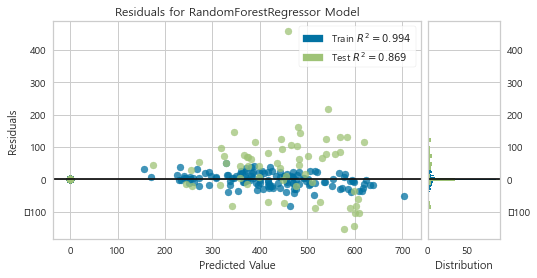

In [59]:
plot_model(cat)

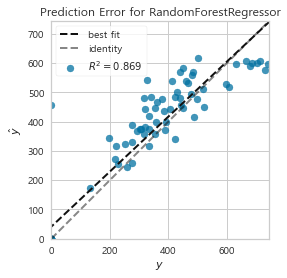

In [60]:
plot_model(cat, plot='error')

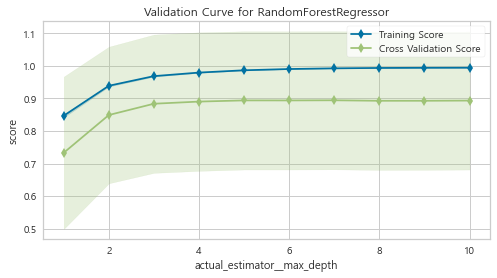

In [61]:
plot_model(cat, plot='vc')

In [62]:
#석식계 인덱스 조정
pred_esb_l=pred_esb_l.set_index('년')
pred_esb_l=pred_esb_l.reset_index()
submission_esb['석식계'] = pred_esb_l['Label']

submission_esb

,일자,중식계,석식계
0,2021-01-27,923.573983,303.650724
1,2021-01-28,853.696894,325.733734
2,2021-01-29,569.062825,210.934242
3,2021-02-01,1054.533159,377.047639
4,2021-02-02,916.343217,344.350344
5,2021-02-03,883.556199,319.757603
6,2021-02-04,850.089673,354.749872
7,2021-02-05,614.957184,252.541770
8,2021-02-08,1046.841787,418.342197
9,2021-02-09,931.733294,364.070752
